Testid erinevate meetoditega

In [ ]:
import numpy as np 
import pandas as pd

train =  pd.read_csv('df_clean.csv')
test = pd.read_csv('df_clean_test.csv')

In [ ]:
train.shape

(8592, 25)

In [ ]:
test.shape

(168, 24)

In [ ]:
pd.set_option('display.max_columns', 500)
train.head()

,Unnamed: 0,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption,timestamp,datetime,year,month,day,weekday,hour,date,is_holiday,season,google_trends_electricity
0,0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577,2021-09-01 00:00:00,2021-09-01 00:00:00,2021,9,1,2,0,2021-09-01,False,Autumn,5
1,1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594,2021-09-01 01:00:00,2021-09-01 01:00:00,2021,9,1,2,1,2021-09-01,False,Autumn,5
2,2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685,2021-09-01 02:00:00,2021-09-01 02:00:00,2021,9,1,2,2,2021-09-01,False,Autumn,5
3,3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016,2021-09-01 03:00:00,2021-09-01 03:00:00,2021,9,1,2,3,2021-09-01,False,Autumn,5
4,4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677,2021-09-01 04:00:00,2021-09-01 04:00:00,2021,9,1,2,4,2021-09-01,False,Autumn,5


In [ ]:
train.dtypes

Unnamed: 0                     int64
time                          object
temp                         float64
dwpt                         float64
rhum                         float64
prcp                         float64
snow                         float64
wdir                         float64
wspd                         float64
wpgt                         float64
pres                         float64
coco                         float64
el_price                     float64
consumption                  float64
timestamp                     object
datetime                      object
year                           int64
month                          int64
day                            int64
weekday                        int64
hour                           int64
date                          object
is_holiday                      bool
season                        object
google_trends_electricity      int64
dtype: object

In [ ]:
train_clean = train.drop(columns=['Unnamed: 0', 'time', 'timestamp', 'datetime', 'date'])

In [ ]:
train_clean.shape

(8592, 20)

In [ ]:
test_clean = test.drop(columns=['Unnamed: 0', 'time', 'timestamp', 'datetime', 'date'])

In [ ]:
test_clean.shape

(168, 19)

In [ ]:
X=train_clean.drop(['consumption'],axis=1)
X['train']=1
test_clean['train']=0
train_test=pd.concat([X,test_clean])

In [ ]:
train_test=pd.get_dummies(train_test)

In [ ]:
train_test.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,year,month,day,weekday,hour,is_holiday,google_trends_electricity,train,season_Autumn,season_Spring,season_Summer,season_Winter
0,11.2,10.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,2021,9,1,2,0,False,5,1,1,0,0,0
1,10.7,9.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,2021,9,1,2,1,False,5,1,1,0,0,0
2,9.9,9.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,2021,9,1,2,2,False,5,1,1,0,0,0
3,10.0,8.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,2021,9,1,2,3,False,5,1,1,0,0,0
4,9.0,8.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,2021,9,1,2,4,False,5,1,1,0,0,0


In [ ]:
train_test["is_holiday"] = train_test["is_holiday"].astype(int)

In [ ]:
train_test_norm=(train_test-train_test.min())/(train_test.max()-train_test.min())

In [ ]:
train_test_norm.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,year,month,day,weekday,hour,is_holiday,google_trends_electricity,train,season_Autumn,season_Spring,season_Summer,season_Winter
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.575026,0.633145,0.712915,0.002455,0.004836,0.558018,0.288714,0.297010,0.597020,0.191689,0.041149,0.665639,0.502439,0.490700,0.499543,0.500000,0.032877,0.369488,0.980822,0.249429,0.251941,0.252055,0.246575
std,0.162253,0.166682,0.218779,0.031798,0.052988,0.246342,0.152588,0.165456,0.147128,0.198909,0.031501,0.471793,0.313458,0.293248,0.333009,0.300982,0.178324,0.192332,0.137158,0.432707,0.434152,0.434217,0.431042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.462609,0.520161,0.575000,0.000000,0.000000,0.388889,0.227129,0.168053,0.519435,0.080000,0.023265,0.000000,0.272727,0.233333,0.166667,0.250000,0.000000,0.273684,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.566957,0.620968,0.787500,0.000000,0.000000,0.583333,0.227129,0.259567,0.614252,0.120000,0.034519,1.000000,0.545455,0.500000,0.500000,0.500000,0.000000,0.305263,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.692174,0.768145,0.887500,0.000000,0.000000,0.750000,0.340694,0.414309,0.684335,0.200000,0.050003,1.000000,0.818182,0.733333,0.833333,0.750000,0.000000,0.452632,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_df=train_test[train_test['train']==1]
test_df=train_test[train_test['train']==0]
train_df=train_df.drop(['train'],axis=1)
test_df=test_df.drop(['train'],axis=1)

In [ ]:
train_df2 = pd.concat([train_df,train_clean['consumption']], axis=1)

In [ ]:
train_df2.shape

(8592, 23)

In [ ]:
test_df.shape

(168, 22)

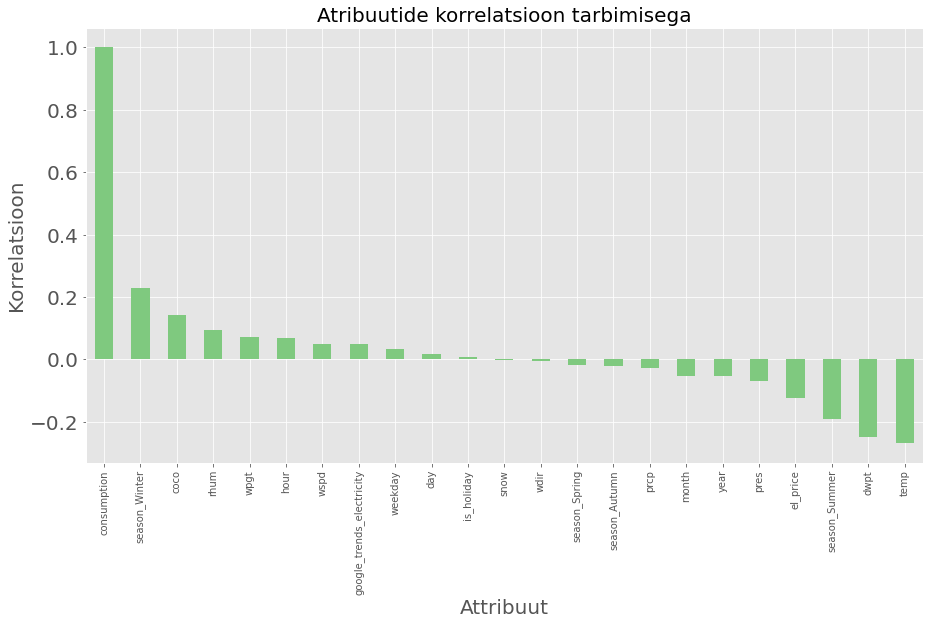

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Get Correlation of "Attrition" with other variables:
plt.figure(figsize=(15,8))
plt.style.use('ggplot')

# Get a color map
my_cmap = cm.get_cmap('Accent')

train_df2.corr()['consumption'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x, y
plt.title('Atribuutide korrelatsioon tarbimisega',fontsize=20)
plt.xlabel('Attribuut', fontsize=20)
plt.ylabel('Korrelatsioon',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

y_all=train_df2['consumption']
X_all=train_df2.drop(['consumption'],axis=1)
train_X, val_X, train_y, val_y = train_test_split(X_all, y_all,random_state=0, test_size = 0.20)

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(train_X, train_y)
val_predictions_lr = model_lr.predict(val_X)

In [ ]:
mean_absolute_error(val_y, val_predictions_lr)

0.6040714330090984

In [ ]:
from sklearn.model_selection import KFold

model_lr = LinearRegression()

n_folds = 4 # we choose 4 folds
fold_MAEs = np.zeros(n_folds)

y = np.array(train_df2['consumption'])
X = np.array(train_df2.drop(['consumption'], axis = 1))

# initialise splitting mechanism
folds = KFold(n_splits=n_folds, shuffle=True, random_state=0) # shuffle=True, random_state=0

# here actual splitting is done
folds.get_n_splits(X, y)

fold_indx = 1

# folds.split is an iterator that loops over different folds
# returning a tuple with train and val indeces
for train_index, val_index in folds.split(X, y):
  #print(f"CV #{fold_indx}") # for computing 
  X_train, X_val = X[train_index], X[val_index]
  y_train, y_val = y[train_index], y[val_index]

  # train the model
  model_lr.fit(X_train, y_train)

  val_predictions = model_lr.predict(X_val)
  fold_MAEs[fold_indx-1] = mean_absolute_error(y_val, val_predictions)

  fold_indx += 1

print(f'Average validation MAE is {np.mean(fold_MAEs)}') 


Average validation MAE is 0.605294058088241


In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_all, y_all)

LinearRegression()

In [ ]:
test_y_predictions_lr = model_lr.predict(test_df)

In [ ]:
submission_lr = pd.DataFrame(
    {'time': test.time, 'consumption': test_y_predictions_lr},
    columns = ['time', 'consumption'])
submission_lr.to_csv('submission_lr.csv', index = False)

0.44184 Kaggle